In [31]:
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [32]:
X = 3
MOMENTUM = 0.5
CYCLE = 1000
STEPSIZE = -0.01

In [33]:
def objective(v: np.array) -> np.array:
    return(np.power(v, 2))

In [34]:
def derivative(v: np.array) -> np.array:
    return(np.dot(2, v))

In [35]:
def distance(v: np.array, w: np.array) -> float:
    v = np.subtract(v, w)
    return(np.power((np.dot(v, v)), 0.5))

In [36]:
def gradient_step(v: np.array, gradient: np.array, prev_step: np.array) -> np.array:
    #Движемся с шагом step_size в напрвлении градиента "gradient" от "v"
    assert len(v) == len(gradient)
    
    step = np.add(np.dot(STEPSIZE, gradient), np.dot(MOMENTUM, prev_step))
    return(step)


v = np.array([random.uniform(-10, 10) for i in range(X)]) #случайная отправная точка
results = objective(v)
print(v)
print(results)

[ 3.414585    4.84723235 -8.5114257 ]
[11.6593907  23.49566142 72.4443674 ]


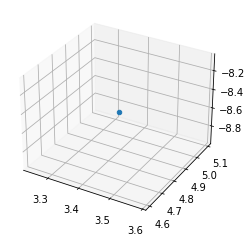

In [37]:
ax = plt.axes(projection="3d")
ax.scatter(v[0], v[1], v[2], "red")
plt.show()

In [42]:
res = np.empty((0, X), float)
scores = np.empty((0, X), float)
prev_step = np.zeros(X)
x = np.zeros(CYCLE)
y = np.zeros(CYCLE)
z = np.zeros(CYCLE)

for epoch in range(CYCLE):
    grad = derivative(v) #вычисляем градиент в v
    step = gradient_step(v, grad, prev_step) #делаем отрицательный градиентный шаг с моментной модификацией, берем умереннный
    v = np.add(step, v)
    #res = np.append(res, [v], axis=0)
    x[epoch] = v[0]
    y[epoch] = v[1]
    z[epoch] = v[2]
    scores = np.append(scores, [step], axis=0)
    prev_step = step
    print(v)


[ 9.77807009e-19  1.38806261e-18 -2.43734794e-18]
[ 9.48273246e-19  1.34613745e-18 -2.36373008e-18]
[ 9.14540900e-19  1.29825213e-18 -2.27964655e-18]
[ 8.79383909e-19  1.24834442e-18 -2.19201186e-18]
[ 8.44217735e-19  1.19842368e-18 -2.10435427e-18]
[ 8.09750294e-19  1.14949483e-18 -2.01843839e-18]
[ 7.76321567e-19  1.10204052e-18 -1.93511169e-18]
[ 7.44080772e-19  1.05627255e-18 -1.85474610e-18]
[ 7.13078760e-19  1.01226311e-18 -1.77746838e-18]
[ 6.83316178e-19  9.70013130e-19 -1.70328016e-18]
[ 6.54768564e-19  9.29487877e-19 -1.63212044e-18]
[ 6.27399385e-19  8.90635493e-19 -1.56389818e-18]
[ 6.01166808e-19  8.53396592e-19 -1.49850908e-18]
[ 5.76027184e-19  8.17709209e-19 -1.43584435e-18]
[ 5.51936828e-19  7.83511333e-19 -1.37579510e-18]
[ 5.28852913e-19  7.50742169e-19 -1.31825457e-18]
[ 5.06733898e-19  7.19342743e-19 -1.26311921e-18]
[ 4.85539712e-19  6.89256176e-19 -1.21028915e-18]
[ 4.65231825e-19  6.60427768e-19 -1.15966834e-18]
[ 4.45773245e-19  6.32805009e-19 -1.11116456e-18]


In [43]:
print(distance(v, np.zeros(X)) < 0.001)

True


In [44]:
print(distance(v, np.zeros(X))) #минимум функции находится в нуле, v-min получился 8.85 * 10^(-37) ≈ 0 

8.856930755240733e-37


In [ ]:
# plot the solutions found
ax = plt.axes(projection="3d")
x, y, z = np.meshgrid(x, y, z)
#for i in range(CYCLE):
ax.plot_surface(x, y, z)
# show the plot
plt.show()